In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,NaN,C
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.850,NaN,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# EDA


#### missing data identification


In [6]:
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### missing data strataies:
- Identify Missing Data
- Discard the columns having too much of missing data(above 25%)
- Treat the missing entries.
    - Try to fill fake entries which does'nt impact the overall data.
        - you can try filling mean values.(in case of numerical data)
        - fill using some imputers.(in case of catagorical data)
- Discard the rows having missing entries. if the missing entries are too low (<less than 4-5%>)


<AxesSubplot:>

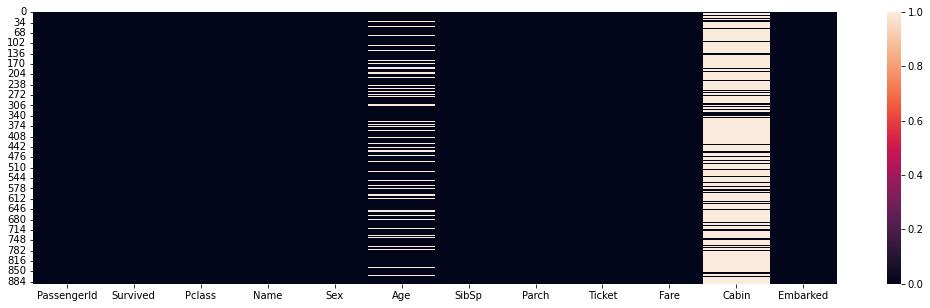

In [8]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

In [9]:
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.shape

(891, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

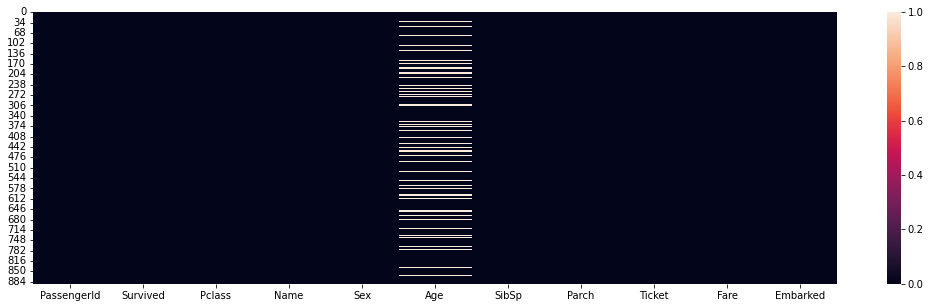

In [12]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:xlabel='Survived', ylabel='Age'>

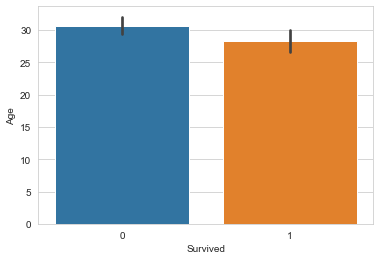

In [13]:
sns.set_style('whitegrid')
sns.barplot(data = df , x='Survived' , y='Age')

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df['Age'].max()

80.0

In [16]:
df['Age'].min()

0.42

In [17]:
df['Age'][df['Survived']==1].min()

0.42

In [18]:
df['Age'].mean()

29.69911764705882

In [19]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

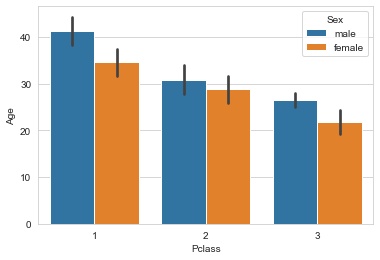

In [20]:
sns.barplot(data=df,y="Age",x='Pclass', hue="Sex")

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

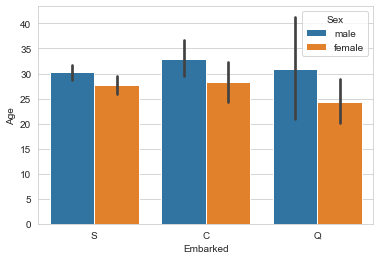

In [21]:
sns.barplot(data=df,y="Age",x='Embarked', hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

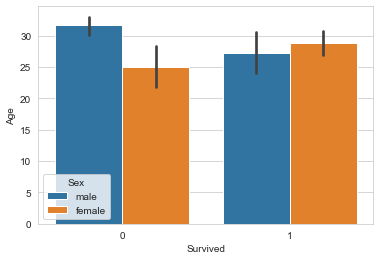

In [22]:
sns.barplot(data=df,y="Age",x='Survived', hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

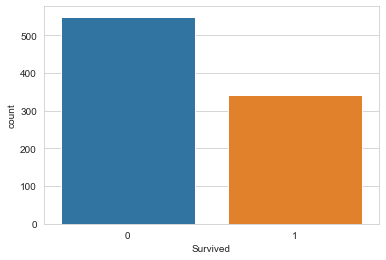

In [23]:
sns.countplot(data=df,x='Survived')

# EDA


In [24]:
target_col='Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket']
df.drop(drop_cols,axis=1,inplace=True)


In [25]:
def num_analysis(cols):
    sns.distplot(df[cols])
    

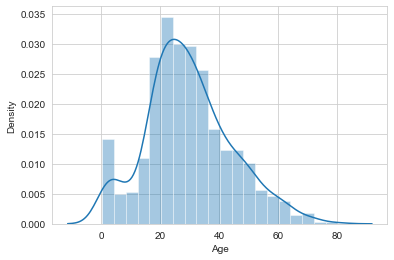

In [26]:
num_analysis("Age")

Age
SibSp
Parch
Fare


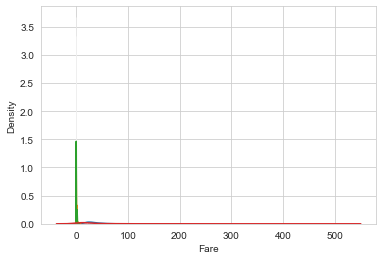

In [27]:
for col in num_cols:
    print(col)
    num_analysis(col)

Pclass
Sex
Embarked


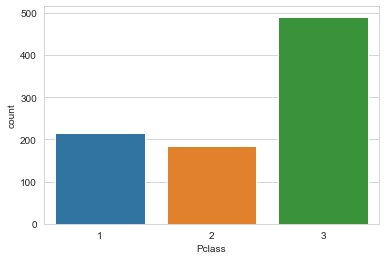

In [28]:
def cat_analysis(cols):
    sns.countplot(data=df,x=cols)
for col in cat_cols:
    print(col)
cat_analysis('Pclass')
#cat_analysis('Sex')
#cat_analysis('Embarked')
    

Pclass
Pclass


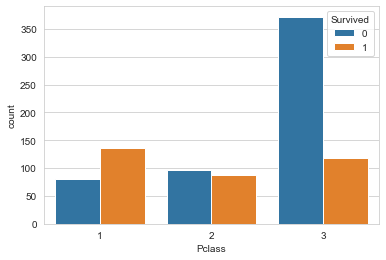

Sex
Sex


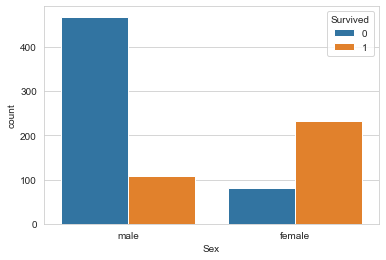

Embarked
Embarked


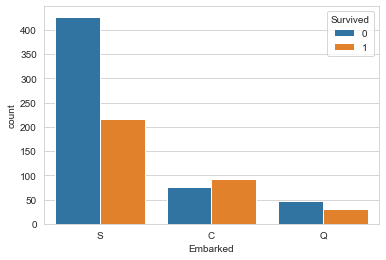

In [29]:
def cat_bivariate(col):
    print(col)
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
    
for col in cat_cols:
    print(col)
    cat_bivariate(col)

Age
Age


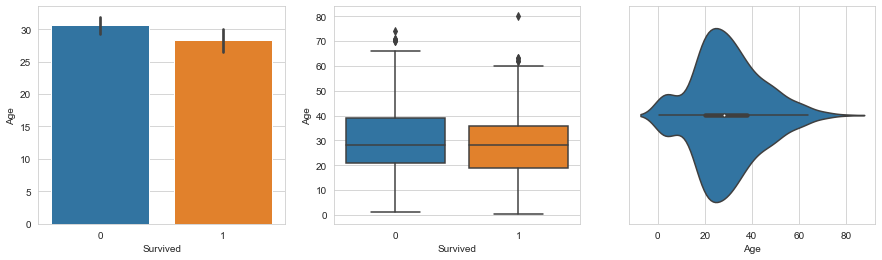

SibSp
SibSp


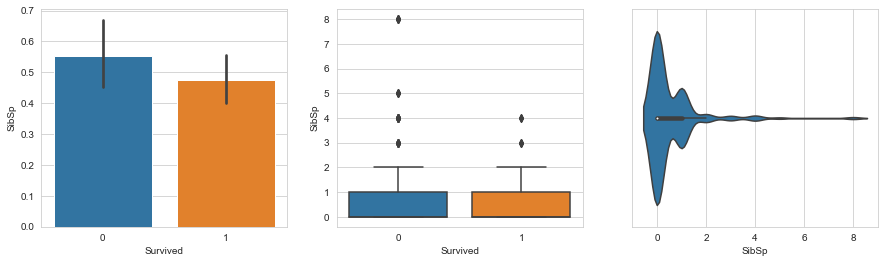

Parch
Parch


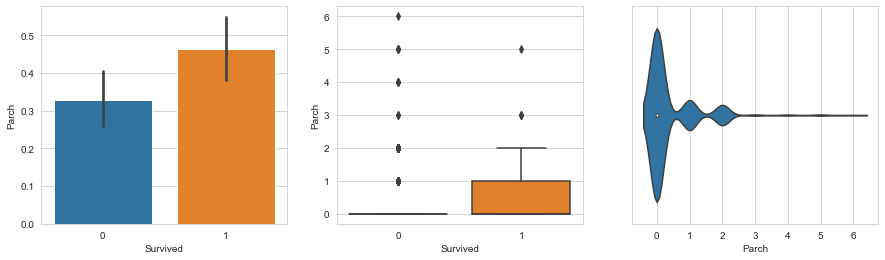

Fare
Fare


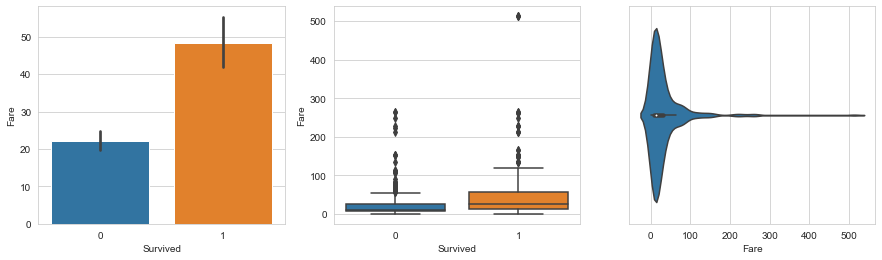

In [30]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=col,hue=target_col)
    plt.show()
    
for col in num_cols:
    print(col)
    num_bivariate(col)

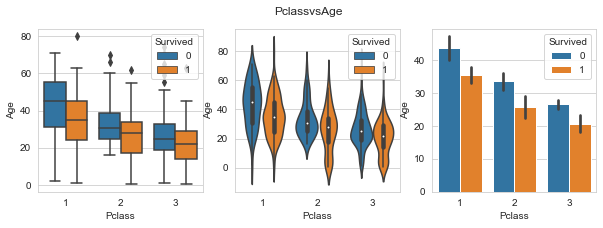

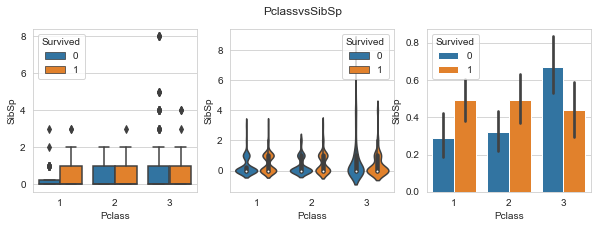

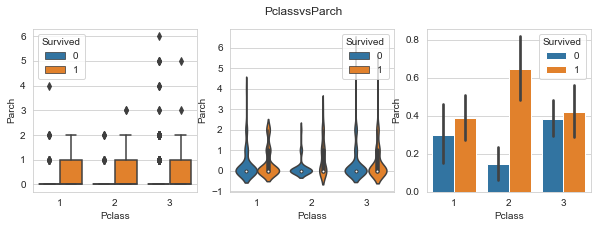

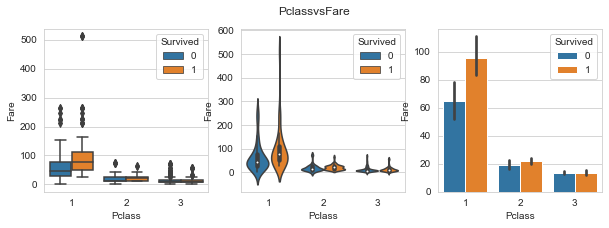

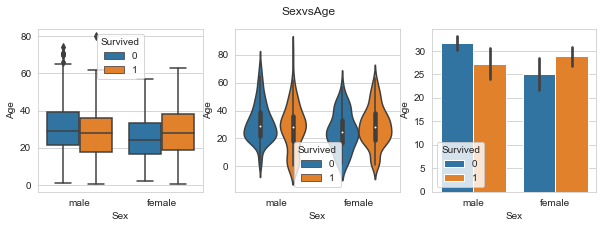

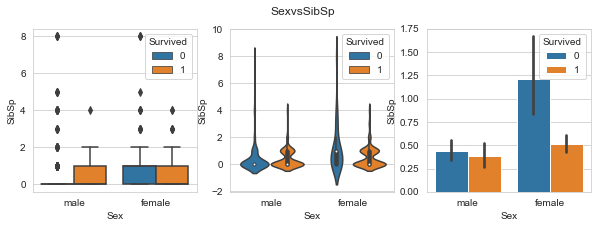

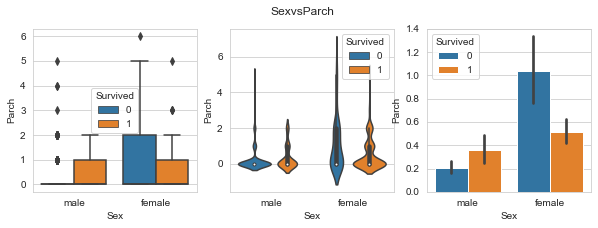

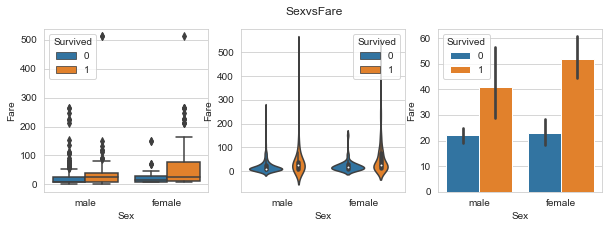

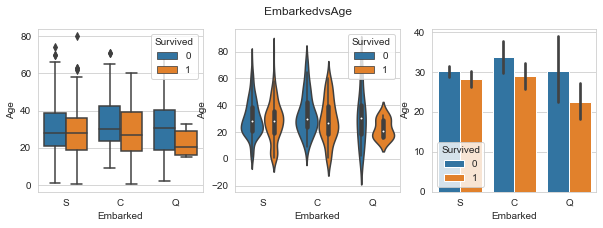

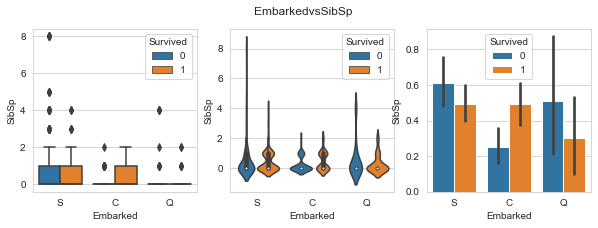

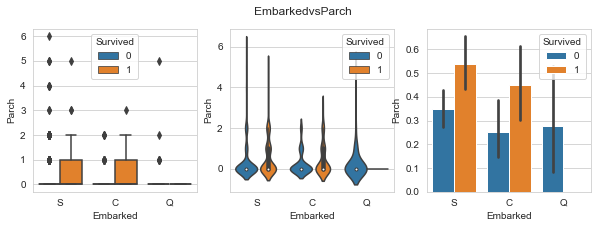

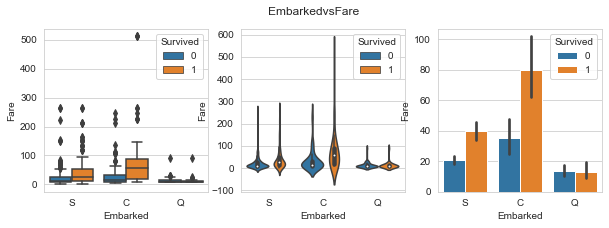

In [31]:
for col in cat_cols:
    if col==target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(10,3))
        plt.suptitle(f'{col}vs{ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=col,y=ncol,hue=target_col)
        plt.subplot(1,3,2)
        sns.violinplot(data=df,x=col,y=ncol,hue=target_col)
        plt.subplot(1,3,3)
        sns.barplot(data=df,x=col,y=ncol,hue=target_col)
        plt.show()

<AxesSubplot:>

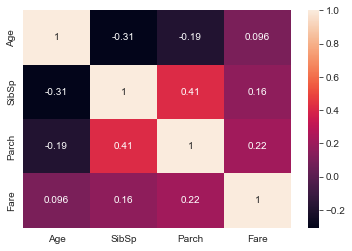

In [32]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [34]:
#impute the fake entries in missing data
def age_imputer(data):
    age = data['Age']
    pclass = data['Pclass']
    sex = data['Sex']
    
    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass) & (df['Sex']==sex)].mean()
    else:
        return age

df['Age'] = df.apply(age_imputer, axis=1)

In [35]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

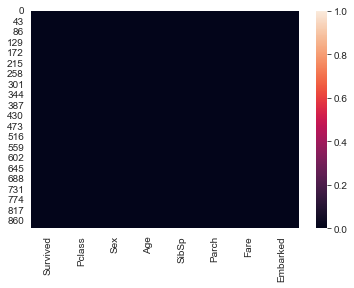

In [36]:
sns.heatmap(pd.isnull(df))

In [37]:
#dropping missing entries which were very less
df.dropna(inplace=True)

<AxesSubplot:>

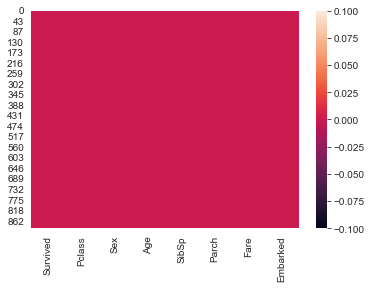

In [38]:
sns.heatmap(df.isnull())

In [39]:
100*df.isnull().sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# String Data Preprocessing
- creating dummy for string


In [41]:
data = pd.get_dummies(df).drop('Sex_female', axis=1)

In [42]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [43]:
target = data[target_col]
features = data.drop(target_col, axis=1)

In [44]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
features.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [46]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


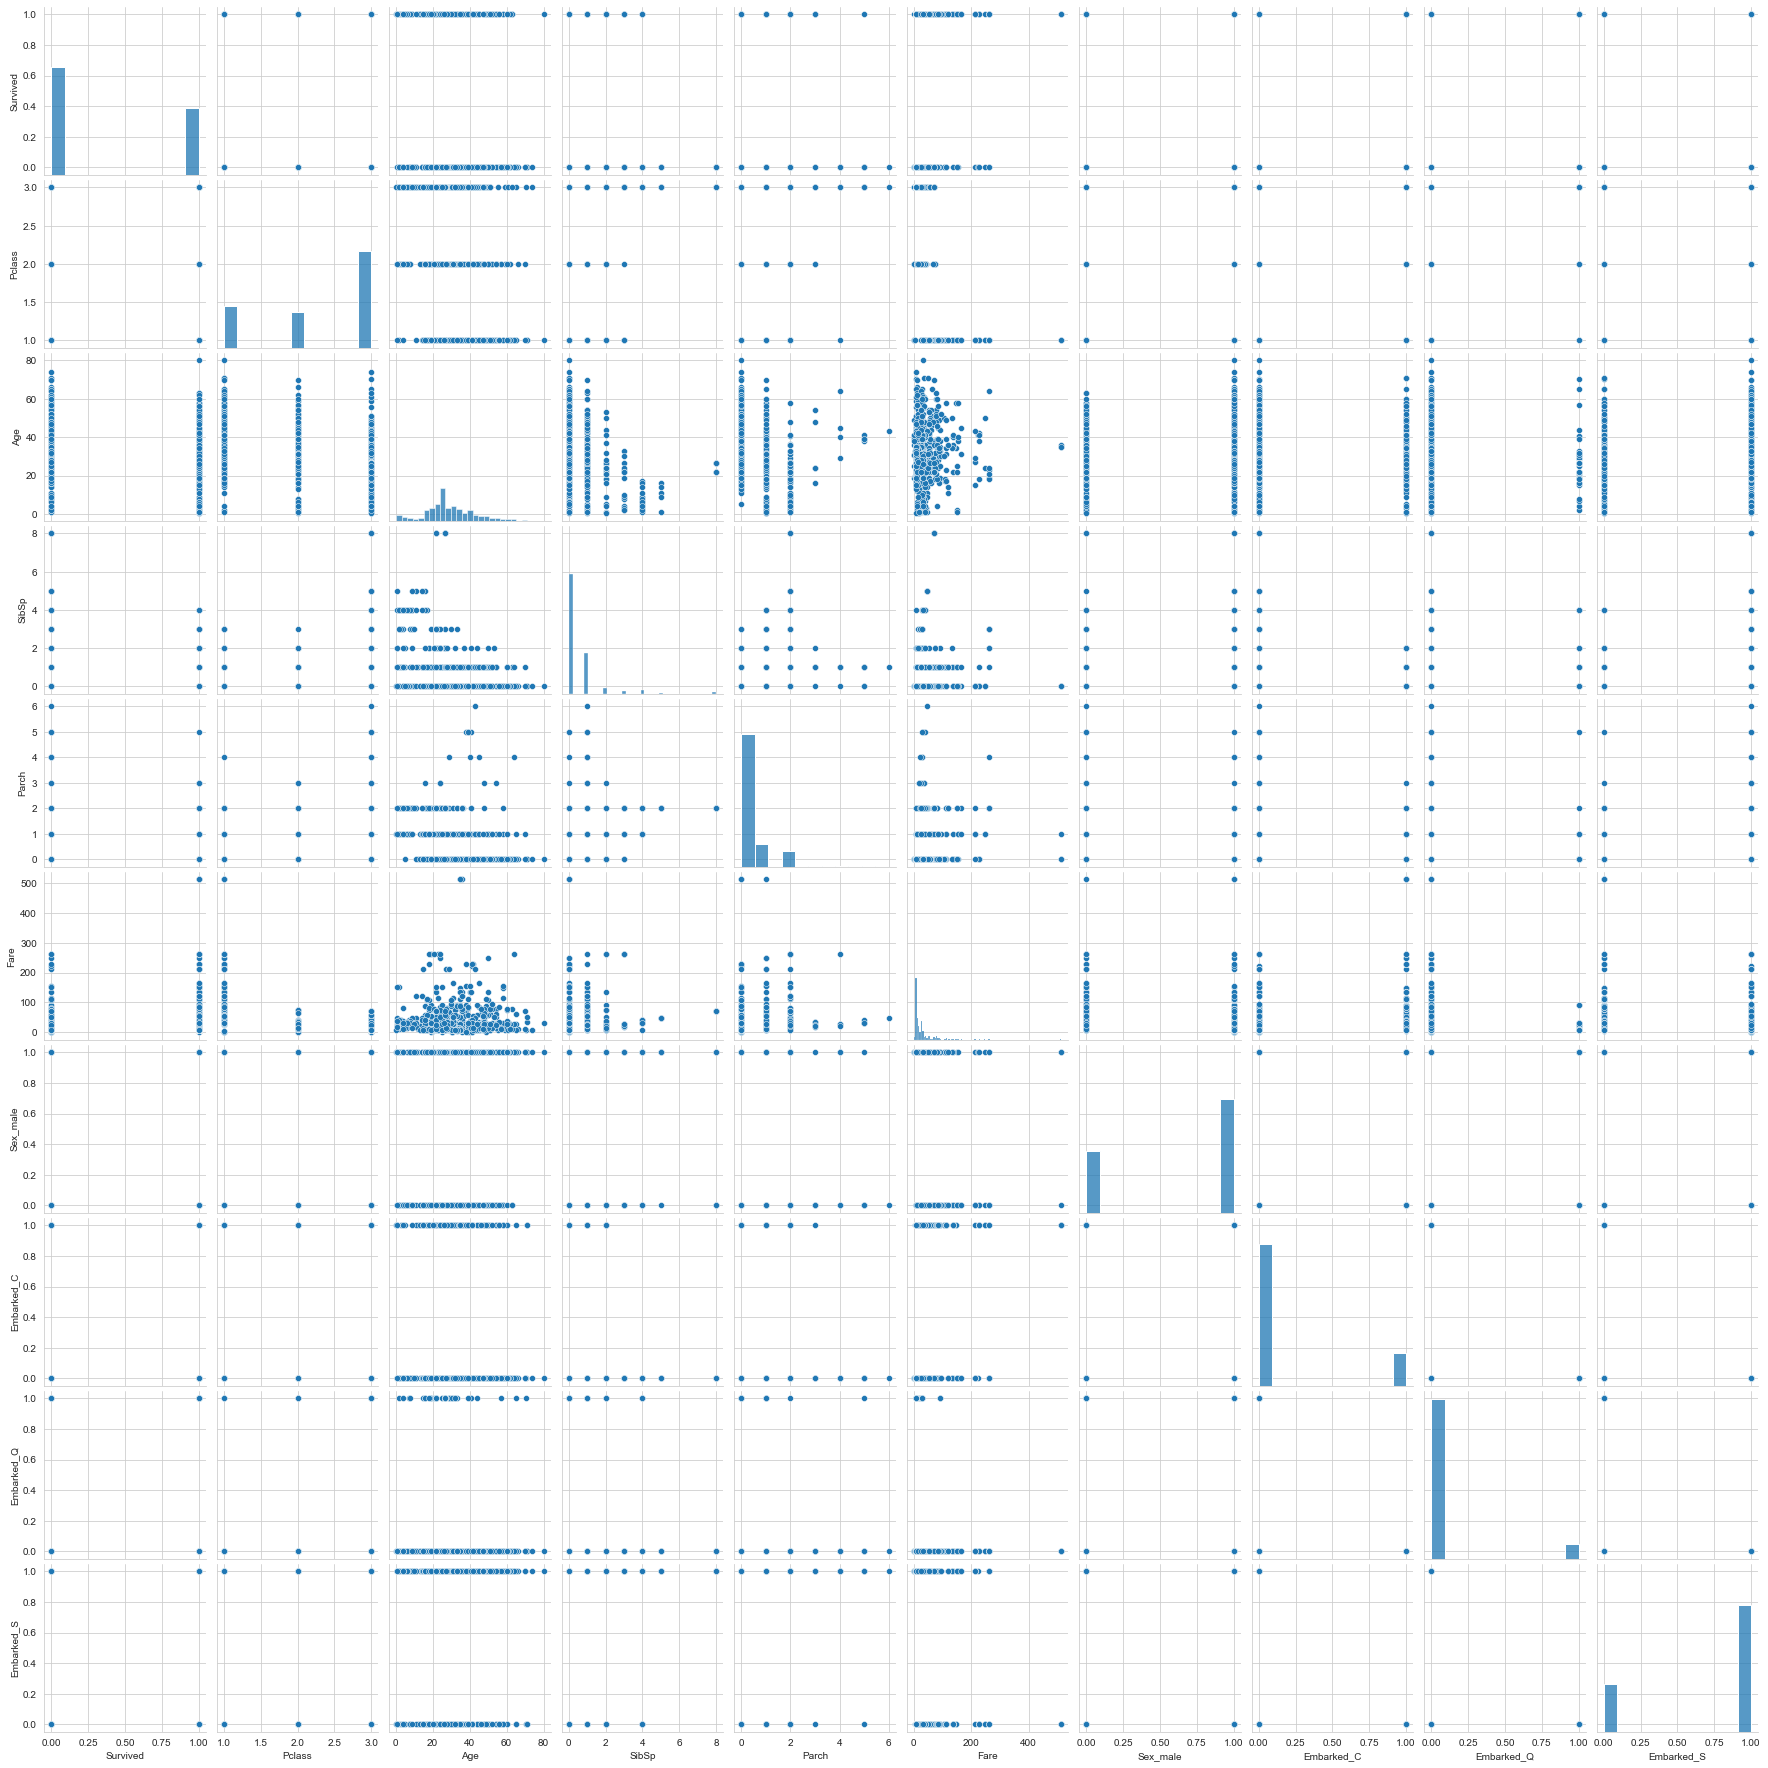

In [47]:
sns.pairplot(data)

# why we decided Logistic Regression? 
1. initially we thought pf doing with pairplot, but since its a catagorical data in target , its not helpful
2. since its binary catagorical target and Features are mixtures of numerical and catagorical both, then i can think of logistic regression

# Machine Learning Template:
Data splitting

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest = train_test_split(features, target, test_size=0.25, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
print(round(100*model.score(xtest,ytest)),'%')

83 %


In [51]:
print(ytest.shape)
ytest.value_counts()

(223,)


0    136
1     87
Name: Survived, dtype: int64

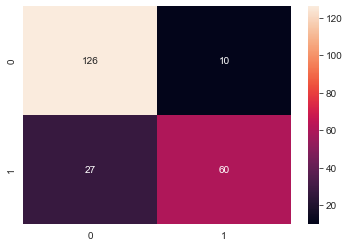

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [52]:
# Conclusion Matrix and Classification Report

from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
ytest_pred = model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True, fmt='d')
plt.show()
#plot_confusion_matrix()

print(classification_report(ytest,ytest_pred))

In [53]:
pd.Series(ytest_pred).value_counts()

0    153
1     70
dtype: int64

# this model is not good as it is biased
#### Its reasons can be:
1) Data set(it is itself biased for deaths)
2) we directly and simply just used LogisticRegression, we should use its different parameters to make it effective

# Improving The Model
* can be done by balancing the dataset
* by hyperparameter Tuning
* Cross Validation

In [54]:
# Putting Class Weight
model1 = LogisticRegression(class_weight={0 : 0.3 , 1 : 0.7})
model1.fit(xtrain,ytrain)
print(100*model1.score(xtest,ytest))
print(classification_report(ytest,model1.predict(xtest)))

78.47533632286996
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       136
           1       0.69      0.82      0.75        87

    accuracy                           0.78       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.78      0.79       223



In [55]:
print(model1.predict(xtest))

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0
 1]


In [56]:
# Putting Class Weight
model1 = LogisticRegression(class_weight={0 : 0.9 , 1 : 0.9})
model1.fit(xtrain,ytrain)
print(100*model1.score(xtest,ytest))
print(classification_report(ytest,model1.predict(xtest)))

# This Method did not work

83.40807174887892
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [57]:
# Hyperparameter
for algo in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    print(algo)
    model1 = LogisticRegression(random_state = 101, solver=algo)
    model1.fit(xtrain,ytrain)
    print(100*model1.score(xtest,ytest))
    print(classification_report(ytest,model1.predict(xtest)))

newton-cg
83.85650224215246
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       136
           1       0.87      0.69      0.77        87

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223

lbfgs
83.40807174887892
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

liblinear
82.95964125560538
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.68      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81     

# Conclusion:
This Dataset is no good for this Model thus this model will not work properly

In [58]:
# This model is not really improving so we should not consider it as the score was quite low as compared to criticalness of situation.

# Decision Tree Algorithm

In [59]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [60]:
print(classification_report(ytest, model_dt.predict(xtest)))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       136
           1       0.66      0.70      0.68        87

    accuracy                           0.74       223
   macro avg       0.73      0.74      0.73       223
weighted avg       0.75      0.74      0.75       223



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(classification_report(ytest, model_rf.predict(xtest))) 


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       136
           1       0.79      0.74      0.76        87

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [62]:
pd.DataFrame(model_dt.feature_importances_, index = xtrain.columns , columns = ['Importance']).sort_values(by = 'Importance' ,ascending=False)

,Importance
Sex_male,0.298897
Fare,0.252170
Age,0.249063
Pclass,0.096656
SibSp,0.056061
Parch,0.027775
Embarked_C,0.014179
Embarked_Q,0.003301
Embarked_S,0.001898


In [63]:
imp_col=['Sex_male','Fare','Age']

In [64]:
model_rf = RandomForestClassifier().fit(xtrain[imp_col],ytrain)
print(classification_report(ytest, model_rf.predict(xtest[imp_col])))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       136
           1       0.73      0.67      0.70        87

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



In [65]:
# we can do same for model_rf just as we did in model_df by using feature_importances_ 

* After applying various Algoriths, It is observed that the score is 82-83% only which we also get by Logistic Regression only
* Also Random forest can be used for less amount of parameters 

In [67]:
pd.to_pickle(model_rf,'survivalrf.pickle')
pd.to_pickle(model,'survival_logistic.pickle')